# Quantile-quantile (QQ) scaled climate projections

In [25]:
import glob
import calendar

import xarray as xr
from xclim import sdba
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import xesmf as xe
import dask.diagnostics

from calc_adjustment import read_data

In [4]:
dask.diagnostics.ProgressBar().register()

In [20]:
# Parameters
model_name = 'ACCESS1-3'
obs_name = 'AGCD'
variable = 'tasmax'
output_units = 'C'
future_scenario = 'rcp45'
model_run = 'r1i1p1'
model_units = None
mapping_method = 'additive'
lat_hbt = -42.9
lon_hbt = 147.3

historical_time_bounds = ['1986-01-01', '2005-12-31']
future_time_bounds = ['2021-01-01', '2040-12-31']

In [6]:
agcd_var_names = {'tasmax': 'tmax'}
agcd_units = {'tasmax': 'C'}
if obs_name == 'AGCD':
    obs_var = agcd_var_names[variable]
    obs_units = agcd_units[variable]
else:
    obs_var = variable
    obs_units = None

model_var = variable

In [7]:
# Required parameters
assert 'model_name' in locals(), "Must provide a model name"
assert 'obs_name' in locals(), "Must provide the name of an observational dataset"
assert 'variable' in locals(), "Must provide a variable name"

## Read data

In [8]:
hist_files = ['/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/day/atmos/day/r1i1p1/latest/tasmax/tasmax_day_ACCESS1-3_historical_r1i1p1_19750101-19991231.nc',
              '/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/day/atmos/day/r1i1p1/latest/tasmax/tasmax_day_ACCESS1-3_historical_r1i1p1_20000101-20051231.nc']

In [12]:
da_hist = read_data(hist_files, model_var, historical_time_bounds, model_units, output_units)
da_hist = da_hist.sel({'lat': lat_hbt, 'lon': lon_hbt}, method='nearest', drop=True)
da_hist

<xarray.DataArray 'tasmax' (time: 7305)>
dask.array<getitem, shape=(7305,), dtype=float32, chunksize=(7305,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1986-01-01T12:00:00 ... 2005-12-31T12:00:00
Attributes:
    standard_name:     air_temperature
    long_name:         Daily Maximum Near-Surface Air Temperature
    units:             °C
    cell_methods:      time: maximum
    cell_measures:     area: areacella
    history:           2012-04-03T11:23:29Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [13]:
da_hist = da_hist.compute()

[########################################] | 100% Completed | 17.0s


In [14]:
future_files = ['/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-3/rcp45/day/atmos/day/r1i1p1/latest/tasmax/tasmax_day_ACCESS1-3_rcp45_r1i1p1_20060101-20301231.nc',
                '/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-3/rcp45/day/atmos/day/r1i1p1/latest/tasmax/tasmax_day_ACCESS1-3_rcp45_r1i1p1_20310101-20551231.nc']

In [15]:
da_future = read_data(future_files, model_var, future_time_bounds, model_units, output_units)
da_future = da_future.sel({'lat': lat_hbt, 'lon': lon_hbt}, method='nearest', drop=True)
da_future

<xarray.DataArray 'tasmax' (time: 7305)>
dask.array<getitem, shape=(7305,), dtype=float32, chunksize=(7305,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01T12:00:00 ... 2040-12-31T12:00:00
Attributes:
    standard_name:     air_temperature
    long_name:         Daily Maximum Near-Surface Air Temperature
    units:             °C
    cell_methods:      time: maximum
    cell_measures:     area: areacella
    history:           2012-04-03T07:15:04Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [16]:
da_future = da_future.compute()

[########################################] | 100% Completed | 12.5s


In [17]:
obs_files = glob.glob('/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_*.nc')
obs_files.sort()

In [18]:
obs_files

['/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1910.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1911.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1912.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1913.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1914.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1915.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1916.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1917.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1918.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1919.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1920.nc',
 '/g/data/zv2/agcd/v1/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_1921.nc',
 '/g/data/zv2/ag

In [19]:
da_obs = read_data(obs_files, obs_var, historical_time_bounds, obs_units, output_units)
da_obs = da_obs.sel({'lat': lat_hbt, 'lon': lon_hbt}, method='nearest', drop=True)
da_obs

<xarray.DataArray 'tmax' (time: 7305)>
dask.array<getitem, shape=(7305,), dtype=float32, chunksize=(7305,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1986-01-01T09:00:00 ... 2005-12-31T09:00:00
Attributes:
    cell_methods:               time: maximum
    units:                      °C
    analysis_version_number:    2.01
    long_name:                  Daily maximum air temperature
    standard_name:              air_temperature
    frequency:                  daily
    length_scale_for_analysis:  250.0
    grid_mapping:               crs
    coverage_content_type:      physicalMeasurement
    valid_range:                [-100.  100.]

In [21]:
da_obs = da_obs.compute()

[########################################] | 100% Completed |  2min 56.2s


## Quantile mapping

In [22]:
mapping_methods = {'additive': '+', 'multiplicative': '*'}
qq_mapping = sdba.EmpiricalQuantileMapping.train(
    da_future, da_hist, nquantiles=100, group="time.month", kind=mapping_methods[mapping_method]
)
#qq_mapping.ds = qq_mapping.ds.assign_coords({'lat': da_fut['lat'], 'lon': da_fut['lon']}) #xclim strips lat/lon attributes
#qq_mapping.ds = qq_mapping.ds.transpose('quantiles', 'month', 'lat', 'lon')

In [40]:
qq_mapping.ds['quantiles'] = qq_mapping.ds['quantiles'] * 100

In [41]:
qq_mapping.ds['hist_q']

<xarray.DataArray 'hist_q' (month: 12, quantiles: 100)>
array([[14.225287, 14.927356, 15.25791 , ..., 25.42652 , 26.045132,
        27.2772  ],
       [14.507209, 15.077975, 15.37995 , ..., 25.697138, 26.902374,
        27.837568],
       [12.432749, 13.499495, 13.769802, ..., 23.513288, 24.069996,
        25.186594],
       ...,
       [ 9.079915,  9.760356, 10.147557, ..., 19.666454, 20.805304,
        22.325796],
       [11.033191, 11.990456, 12.601336, ..., 21.87539 , 22.46719 ,
        23.169115],
       [13.147767, 13.649908, 14.055003, ..., 24.024559, 24.930092,
        25.619862]], dtype=float32)
Coordinates:
  * quantiles  (quantiles) float32 0.5 1.5 2.5 3.5 4.5 ... 96.5 97.5 98.5 99.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    standard_name:     Model quantiles
    long_name:         Quantiles of model on the reference period
    units:             °C
    cell_methods:      time: maximum
    cell_measures:     area: areacella
    history:           2012-04-03T11:23:29Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [42]:
yticks = np.arange(1,13)
ytick_labels = [calendar.month_abbr[i] for i in yticks]

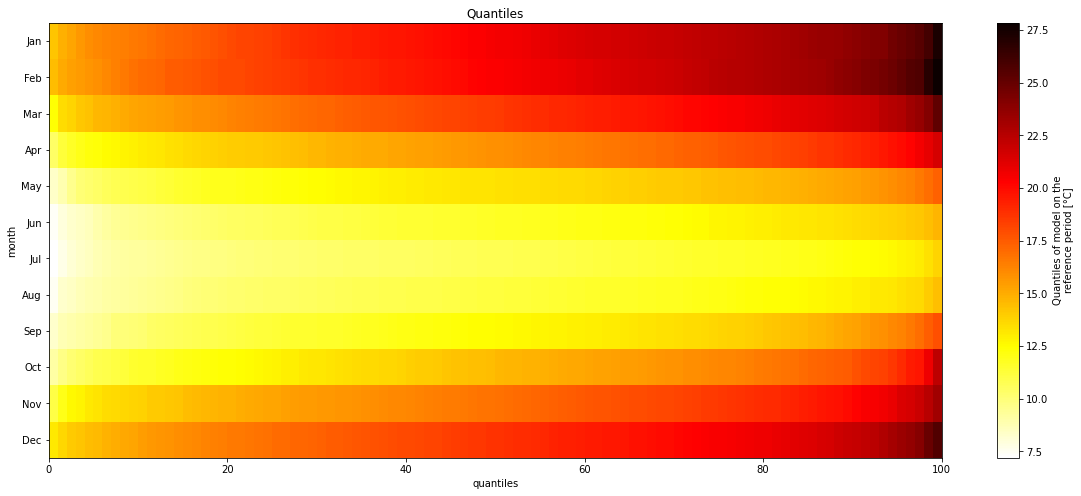

In [43]:
fig, ax = plt.subplots(figsize=[20, 8])
qq_mapping.ds['hist_q'].plot(cmap='hot_r')
plt.yticks(yticks, ytick_labels)
ax.invert_yaxis()
plt.title('Quantiles')
plt.show()

In [44]:
qq_mapping.ds['af']

<xarray.DataArray 'af' (month: 12, quantiles: 100)>
array([[ 0.14342976,  0.3378172 ,  0.48983383, ...,  0.66508293,
         0.6630039 ,  0.92512894],
       [ 0.3697958 ,  0.3392725 ,  0.7059784 , ...,  0.5462265 ,
        -0.3507309 ,  0.28958893],
       [ 1.4478874 ,  0.9017086 ,  0.9992838 , ...,  0.9955158 ,
         0.74266434,  0.794302  ],
       ...,
       [ 0.6694164 ,  0.95744705,  0.8363962 , ...,  2.070118  ,
         1.3499374 ,  1.1558704 ],
       [ 0.2219944 ,  0.10604095, -0.04462242, ...,  0.27715683,
         0.08114433,  0.98501015],
       [ 0.2467165 ,  0.5344105 ,  0.6518822 , ...,  1.3768826 ,
         1.1547165 ,  1.6378403 ]], dtype=float32)
Coordinates:
  * quantiles  (quantiles) float32 0.5 1.5 2.5 3.5 4.5 ... 96.5 97.5 98.5 99.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    standard_name:     Adjustment factors
    long_name:         Quantile mapping adjustment factors
    units:             °C
    cell_methods:      time: maximum
    cell_measures:     area: areacella
    history:           2012-04-03T07:15:04Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...
    kind:              +

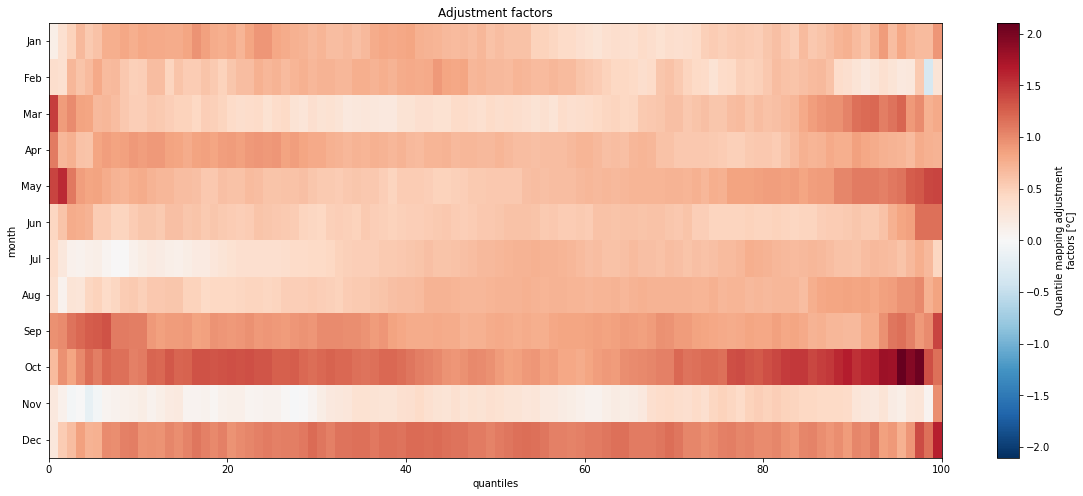

In [45]:
fig, ax = plt.subplots(figsize=[20, 8])
qq_mapping.ds['af'].plot()
plt.yticks(yticks, ytick_labels)
ax.invert_yaxis()
plt.title('Adjustment factors')
plt.show()

In [2]:
#fig = plt.figure(figsize=[10, 7])
#ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
#qm.ds['af'].isel({'month': 0, 'quantiles': 50}).plot(
#    ax=ax,
#    cmap='RdBu_r',
#    transform=ccrs.PlateCarree(),
#    extend='both',
#    levels=np.arange(-3, 3.1, 0.25)
#)
#ax.coastlines()
#ax.set_extent([110, 160, -10, -45], crs=ccrs.PlateCarree())
#plt.show()

## QQ-scaled projections

In [40]:
#regridder = xe.Regridder(ds_hist, ds_obs, "bilinear")
#qq_mapping.ds = regridder(qq_mapping.ds)

In [48]:
qq_obs = qq_mapping.adjust(da_obs, extrapolation="constant", interp="linear")
qq_obs = qq_obs.rename(variable)

time_adjustment = da_future['time'].values[0] - qq_obs['time'].values[0]
qq_obs = qq_obs.assign_coords({'time': qq_obs['time'].values + time_adjustment})

qq_obs

<xarray.DataArray 'tasmax' (time: 7305)>
array([17.793688, 15.147983, 19.542315, ..., 25.05057 , 25.27977 ,
       19.31452 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01T12:00:00 ... 2040-12-31T12:00:00
Attributes:
    cell_methods:               time: maximum
    units:                      °C
    analysis_version_number:    2.01
    long_name:                  Daily maximum air temperature
    standard_name:              air_temperature
    frequency:                  daily
    length_scale_for_analysis:  250.0
    grid_mapping:               crs
    coverage_content_type:      physicalMeasurement
    valid_range:                [-100.  100.]
    history:                    [2022-05-10 13:11:40] : Bias-adjusted with Em...
    bias_adjustment:            EmpiricalQuantileMapping(group=Grouper(add_di...

In [49]:
qq_obs = qq_obs.compute()

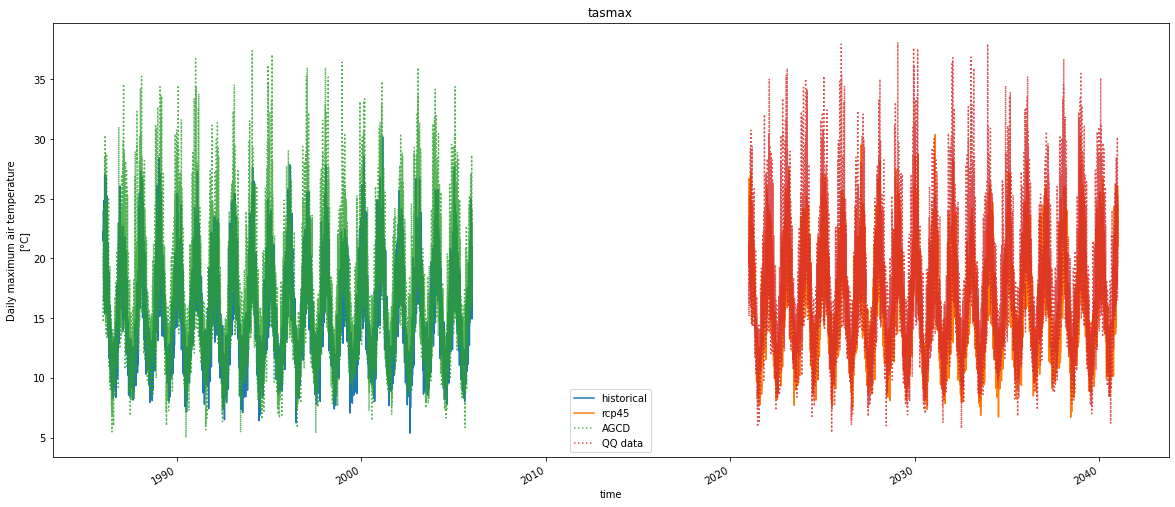

In [51]:
fig, ax = plt.subplots(figsize=[20, 8])
da_hist.plot(label="historical")
da_future.plot(label=future_scenario)
da_obs.plot(label=obs_name, linestyle=':', alpha=0.8)
qq_obs.plot(label="QQ data", linestyle=':', alpha=0.8)
plt.title(variable)
plt.legend()
plt.show()

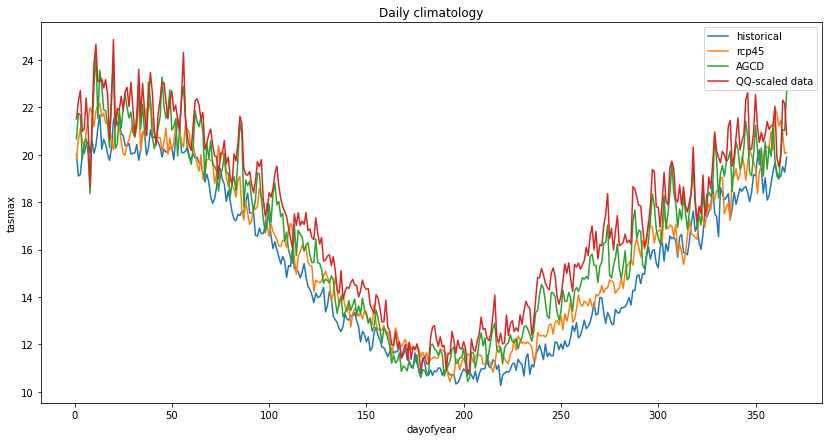

In [52]:
fig, ax = plt.subplots(figsize=[14, 7])
da_hist.groupby("time.dayofyear").mean().plot(label="historical")
da_future.groupby("time.dayofyear").mean().plot(label=future_scenario)
da_obs.groupby("time.dayofyear").mean().plot(label=obs_name)
qq_obs.groupby("time.dayofyear").mean().plot(label="QQ-scaled data")
plt.legend()
plt.title('Daily climatology')
plt.show()

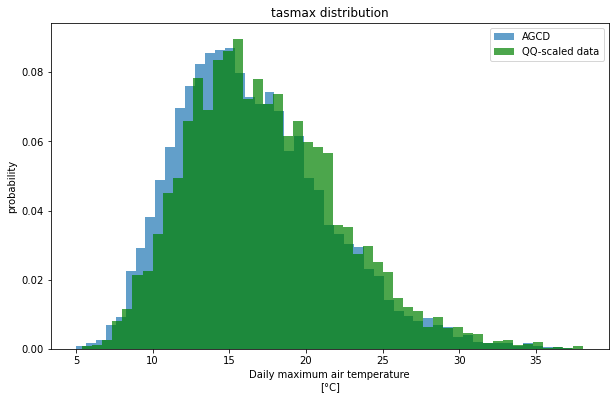

In [54]:
fig = plt.figure(figsize=[10, 6])
da_obs.plot.hist(bins=50, density=True, label=obs_name, alpha=0.7)
qq_obs.plot.hist(bins=50, density=True, label='QQ-scaled data', facecolor='green', alpha=0.7)
plt.ylabel('probability')
plt.title(f'{variable} distribution')
plt.legend()
plt.show()